## Desafío 1

#### Grupo
 Juan Manuel, Rafael, Diego Cabrera
#### Objetivos:
-  Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.
-  Realizar un análisis descriptivo de las principales variables.
-  Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.

 



In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/properatti.csv.gz', compression='gzip', header=0)


In [154]:
df.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [155]:
#Copia de DF original
df_bkp = df

In [156]:
#Print columns
df.describe('')

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [157]:
df.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

####  Limpieza del dataset
   - a. Listado de columnas a eliminar. Armar funcion
   - b. Si hiciera falta, renombrar columnas para que sean mas representativas 
   
####  Analisis descriptivo
   - a. 
####  Nuevas columnas y valores predictivos
   - a. Armar fnc para crear automaticamente columnas para usar de flag para saber si se tocan datos
   - b.

In [158]:
df['price'].describe()

count    1.008100e+05
mean     4.685259e+05
std      2.260101e+06
min      0.000000e+00
25%      1.100000e+05
50%      1.850000e+05
75%      4.200000e+05
max      6.500000e+08
Name: price, dtype: float64

In [159]:
df.count()

Unnamed: 0                    121220
operation                     121220
property_type                 121220
place_name                    121197
place_with_parent_names       121220
country_name                  121220
state_name                    121220
geonames_id                   102503
lat-lon                        69670
lat                            69670
lon                            69670
price                         100810
currency                      100809
price_aprox_local_currency    100810
price_aprox_usd               100810
surface_total_in_m2            81892
surface_covered_in_m2         101313
price_usd_per_m2               68617
price_per_m2                   87658
floor                           7899
rooms                          47390
expenses                       14262
properati_url                 121220
description                   121218
title                         121220
image_thumbnail               118108
dtype: int64

In [160]:
#FUNCIONES 

#1. Elimina columnas
def drop_columns(df, serie):
    #print ('Eliminando columna/s ' + serie )
    df = df.drop(columns=serie,axis=1)
    return df
#2. Crea columnas "flag"
def make_flags(df, cols):
    col = {c: [add_flag(df, str(c))]
            for c in cols}

def add_flag(df, column): 
       # Creamos el nombre de la columna FLAG
    new_col = column + '_flag'
    # Creamos la columna con los valor 1 si la columna original tiene el registro null; sino, valor 0
    df[new_col] = df[column].isnull().astype(np.int8)
    print ('Columna ' + new_col +' creada' )

#3. Renombra columna
def rename_columns(df, cols):
    df = df.rename(cols, axis='columns')
    return df
    
#4. Elimina caracteres non-ascii   
def _removeNonAscii(s): return "".join(i for i in s if ord(i)<128)

#5. Calcula promedio por lugar/zona
def get_mean (state, nplace):
    global cnt_success
    global cnt_error
    try:
        cnt_success+= 1;
        if (CALCULAR_PRECIO_MT2_MEDIA_SIN_OUTLIERS):
            mn = df_price_per_m2_wo_outliers.loc[state, nplace]['mean']
        else:
            mn = df_price_per_m2.loc[state, nplace]['mean']
        return mn
    except Exception:
        #print 'error'
        #print('Error en ' +str(nplace))
        cnt_error+= 1;
        pass
        return np.nan

#6. calcula_ambientes en base a los mts2
def calcula_ambientes_xmt2 (mts):
    try:
       val = int(mts)
    except ValueError:
        return np.nan; #print("That's not an int!. Value: " + str(mts))
    val;

    if val <40:
       return 1;
    elif val <60:
       return 2;
    elif  val <80:
       return 3;
    elif  val <100:
       return 4;
    elif  val <120:
       return 5;
    elif  val >120:
       return 6;
    else:
       return np.nan;
# 7. calcula_mts2_xambientes
def calcula_mts2_xambientes (mts):
    try:
       val = int(mts)
    except ValueError:
        return np.nan; #print("That's not an int!. Value: " + str(mts))
    val;

    if val == 1:
       return 40;
    elif val == 2:
       return 60;
    elif  val == 3:
       return 80;
    elif  val == 4:
       return 100;
    elif  val == 5:
       return 120;
    elif  val >5:
       return 150;
    else:
       return np.nan;

#8. Calcula numero de ambientes en base a string 
def uno():
    return 1
def un():
    return 1
def dos():
    return 2
def tres():
    return 3
def cuatro():
    return 4
def cinco():
    return 5
def seis():
    return 6
def siete():
    return 7

switcher = {
        'un': uno,
        'uno': uno,
        'tres': tres,
        'cuatro': cuatro,
        'cinco': cinco,
        'seis': seis,
        'siete': siete
    }

def strings_to_number(argument,subfnc):
     try:
        str(argument)
        if argument <> 'nan':
            print 'pricessing ' + argument
    # Get the function from switcher dictionary
        func = switcher.get(argument,  lambda: np.nan)
    # Execute the function
        numb = func()
        if (subfnc == 'dorm'): # & (numb.is_integer()):
            numb = numb + 1  #Le sumo 1: 2 dormitorios = 3 ambientes
        return numb
     except ValueError:
        return np.nan; #print("That's not an int!. Value: " + str(mts))
    

In [161]:
# Variables GLobals
#Columnas a eliminar:
    #price, price_aprox_local_currency y currency: Tomamos en cuenta solo el valor en dolares (columna price_aprox_usd)
    #price_per_m2: Tomamos en cuenta solo el valor de price_usd_per_m2
COLUMNAS_A_ELIMINAR=["Unnamed: 0","lat-lon","currency","price_per_m2","price_aprox_local_currency","price","properati_url","title","image_thumbnail"];
#Columnas en las que llenaremos datos faltantes. ENtonces, creamos  columna que usaremos de flag para registrar los datos que tocamos
COLUMNAS_FLAG=['price','rooms','place']
#COlumnas a renombrar
COLUMNAS_A_RENOMBRAR={'price_aprox_usd':'price','place_name':'place','price_usd_per_m2':'price_per_m2'}
#Utilizado en fnc get_mean
cnt_success = 0
cnt_error = 0
#CALCULAR_MEDIA_SIN_OUTLIERS: Si lo definimos en true, se calculara la media del precio xmt2 por zonas SIN outliers 
CALCULAR_PRECIO_MT2_MEDIA_SIN_OUTLIERS=True


In [162]:
#Elimino columnas
df = drop_columns(df, COLUMNAS_A_ELIMINAR)
#Renombro columnas
df = rename_columns(df, COLUMNAS_A_RENOMBRAR)

In [163]:
#Creo nuevas columnas "flag"
make_flags(df,COLUMNAS_FLAG)

Columna price_flag creada
Columna rooms_flag creada
Columna place_flag creada


In [164]:
#Valores nulos por columna
df.isnull().sum().sort_values()

operation                       0
price_flag                      0
rooms_flag                      0
state_name                      0
place_flag                      0
place_with_parent_names         0
property_type                   0
country_name                    0
description                     2
place                          23
geonames_id                 18717
surface_covered_in_m2       19907
price                       20410
surface_total_in_m2         39328
lat                         51550
lon                         51550
price_per_m2                52603
rooms                       73830
expenses                   106958
floor                      113321
dtype: int64

Total registros: 121220

Valores necesarios: 

- place_name 

Barrio/3 nivel de ubicacion; 1er y 2do nivel está completo (country_name/state_name). Tenemos completo -place_with_parent_names, de ahi se puede extraer el 3er nivel
- surface_total_in_m2
- price
- price_per_m2
- rooms

# PLACE NAME

In [165]:
df["place"].isnull().value_counts()

False    121197
True         23
Name: place, dtype: int64

In [166]:
#Verifico la 3 columna de place_with_parent_names
df[df["place"].isnull()]["place_with_parent_names"].str.split('|').str[3].value_counts()

Tigre    23
Name: place_with_parent_names, dtype: int64

In [167]:
#Cargo los datos de place_name y elimino la columna place_with_parent_names
df["place"] = df["place_with_parent_names"].apply(lambda place_with_parent_names: place_with_parent_names.split('|')[3] if (place_with_parent_names.split('|')[3]) else (place_with_parent_names.split('|')[2]))
#Elimino place_with_parent_names
df = drop_columns(df, "place_with_parent_names")

In [168]:
df['place'].value_counts().head(10)

Córdoba            9254
Tigre              8983
Rosario            8504
Mar del Plata      7710
Palermo            4083
Vicente López      3663
Lomas de Zamora    3470
La Plata           3360
Pilar              3252
San Isidro         3009
Name: place, dtype: int64

In [169]:
#Valores nulos por columna
df.isnull().sum().sort_values()

operation                     0
price_flag                    0
rooms_flag                    0
state_name                    0
place_flag                    0
place                         0
property_type                 0
country_name                  0
description                   2
geonames_id               18717
surface_covered_in_m2     19907
price                     20410
surface_total_in_m2       39328
lat                       51550
lon                       51550
price_per_m2              52603
rooms                     73830
expenses                 106958
floor                    113321
dtype: int64

# Rooms

Para los casos donde no tenemos el valor "rooms", intentaremos sacar informacion de la columna descripcion. Creamos una nueva columna como flag para indicar si rooms no estaba cargado

In [170]:
regexp="(\d+)(\s|())amb"
#a. Rooms null y en description aparece N amb*, pongo N como valor en rooms
df.loc[df['rooms'].isnull(),'rooms'] = df.loc[(df["rooms"].isnull()),"description"].str.lower().str.extract(regexp)[0]

#b. en la descripcion aparece "monoambiente" o "mono" y rooms es null, pongo 1
df.loc[((df['rooms'].isnull()) & (df['description'].str.lower().str.contains('monoambiente')) | df['description'].str.lower().str.contains('mono')),'rooms'] = 1

#c. x Dormitorios SUMAR 1
regexp="(\d+)(\s|())dorm"
df.loc[df['rooms'].isnull(),'rooms'] = (df.loc[(df["rooms"].isnull()),"description"].str.lower().str.extract(regexp)[0])




In [171]:
df['description'][915]#1


'Ideal para Inversores. Son 2 casas en un mismo terreno, la de atras a estrenar., con un amplio terreno a metros de  ruta 70. Bella Italia. -  - ODN+ OFICINA DE NEGOCIOS INMOBILIARIOS'

In [172]:
#Revisamos el valor "surface_covered_in_m2" para estimar los ambientes. 

df.loc[df["rooms"].isnull() & df["surface_covered_in_m2"].notnull(),"rooms"] =  \
df.loc[df["rooms"].isnull() & df["surface_covered_in_m2"].notnull(),"surface_covered_in_m2"].apply(lambda surface_covered_in_m2: calcula_ambientes_xmt2(surface_covered_in_m2))

#Sino, nos basamos en el valor "surface_total_in_m2" para estimar los ambientes. 

df.loc[df["rooms"].isnull() & df["surface_covered_in_m2"].isnull() & df["surface_total_in_m2"].notnull() ,"rooms"] =  \
df.loc[df["rooms"].isnull() & df["surface_covered_in_m2"].isnull() & df["surface_total_in_m2"].notnull() ,"surface_total_in_m2"] .apply(lambda surface_total_in_m2: calcula_ambientes_xmt2(surface_total_in_m2))


In [173]:
# Calculo cantidad de rooms en base al string. Ej. "dos ambientes"
# no especifica cantidad de dormitorios:
regexp="(\w+) amb"

#df.loc[df["rooms"].isnull(),"description"].str.lower().str.extract(regexp)[0]

df.loc[df["rooms"].isnull(),"rooms"] =  \
df.loc[df["rooms"].isnull(),"description"].str.lower().str.extract(regexp)[0].apply(lambda description: strings_to_number(str(description),'amb'))
#Mismo caso, pero esta vez en base a dormitorios. Ej. "un dormitorio" = 2 ambientes
regexp="(\w+) dorm"

#df.loc[df["rooms"].isnull(),"description"].str.lower().str.extract(regexp)[0]

df.loc[df["rooms"].isnull(),"rooms"] =  \
df.loc[df["rooms"].isnull(),"description"].str.lower().str.extract(regexp)[0].apply(lambda description: strings_to_number(str(description),'dorm'))


pricessing de
pricessing dos
pricessing cinco
pricessing dos
pricessing amplio
pricessing los
pricessing dos
pricessing los
pricessing un
pricessing los
pricessing los
pricessing los
pricessing dos
pricessing dos
pricessing los
pricessing dos
pricessing dos
pricessing los
pricessing para
pricessing tres
pricessing por
pricessing los
pricessing los
pricessing esta
pricessing tres
pricessing sobre
pricessing sobre
pricessing dos
pricessing tres
pricessing un
pricessing los
pricessing tres
pricessing de
pricessing ambiente
pricessing tres
pricessing para
pricessing dos
pricessing los
pricessing cuatro
pricessing cuatro
pricessing dos
pricessing tres
pricessing tres
pricessing tres
pricessing tres
pricessing los
pricessing dos
pricessing dos
pricessing amplios
pricessing tres
pricessing dos
pricessing un
pricessing cuatro
pricessing que
pricessing los
pricessing los
pricessing los
pricessing los
pricessing dos
pricessing dos
pricessing solo
pricessing los
pricessing cuatro
pricessing los
p

pricessing dos
pricessing dos
pricessing dos
pricessing tres
pricessing dos
pricessing dos
pricessing dos
pricessing dos
pricessing amplio
pricessing dos
pricessing dos
pricessing tres
pricessing dos
pricessing dos
pricessing dos
pricessing dos
pricessing dos
pricessing un
pricessing dos
pricessing tres
pricessing un
pricessing dos
pricessing tres
pricessing un
pricessing y
pricessing y
pricessing un
pricessing dos
pricessing los
pricessing de
pricessing de
pricessing de
pricessing de
pricessing los
pricessing de
pricessing de
pricessing tres
pricessing y
pricessing dos
pricessing otro
pricessing segundo
pricessing dos
pricessing dos
pricessing dos
pricessing un
pricessing dos
pricessing dos
pricessing dos
pricessing dos
pricessing tres
pricessing un
pricessing tres
pricessing dos
pricessing dos
pricessing cuatro
pricessing dos
pricessing tres
pricessing tres
pricessing dos
pricessing dos
pricessing tres
pricessing tres
pricessing dos
pricessing un
pricessing un
pricessing un
pricessin

In [174]:
df.loc[915]

operation                                                             sell
property_type                                                        house
place                                                         Bella Italia
country_name                                                     Argentina
state_name                                                        Santa Fe
geonames_id                                                    6.94284e+06
lat                                                               -31.2553
lon                                                               -61.4743
price                                                                  NaN
surface_total_in_m2                                                    456
surface_covered_in_m2                                                  220
price_per_m2                                                           NaN
floor                                                                  NaN
rooms                    

# Price

1. Price null pero tengo surface_in_m2 y price_per_m2 entonces calculo precio
2. Calculo precio promedio por state_name/place
3. Si no tengo price ni price_per_m2 pero si surface_in_m2, entonces calculo price en base al promedio por place


In [175]:
#Price null pero tengo surface_in_m2 y price_per_m2 entonces calculo precio
df.loc[df['price'].isnull() & df["surface_total_in_m2"].notnull() & df["surface_total_in_m2"].notnull(),"price"] =  \
df.loc[df['price'].isnull() & df["surface_total_in_m2"].notnull() & df["price_per_m2"].notnull()].apply(lambda row: row.surface_total_in_m2 * row.price_per_m2, axis=1)

In [176]:
df.loc[df['price'].isnull()]

,operation,property_type,place,country_name,state_name,geonames_id,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_per_m2,floor,rooms,expenses,description,price_flag,rooms_flag,place_flag
5,sell,house,Gualeguaychú,Argentina,Entre Ríos,3433657.0,-33.014071,-58.519828,NaN,53.0,NaN,NaN,NaN,2,NaN,"Casa en el perímetro del barrio 338, ubicada e...",1,1,0
20,sell,house,Villa Giardino,Argentina,Córdoba,3832729.0,-31.052985,-64.499128,NaN,148.0,148.0,NaN,NaN,6,NaN,"Consta de: Comedor-cocina, cuatro dormitorios ...",1,1,0
41,sell,apartment,Villa Carlos Paz,Argentina,Córdoba,3832791.0,-31.400999,-64.478026,NaN,115.0,115.0,NaN,NaN,4,NaN,“Arecas” es un complejo de dúplex y departamen...,1,0,0
62,sell,house,Berazategui,Argentina,Bs.As. G.B.A. Zona Sur,3436042.0,NaN,NaN,NaN,156.0,156.0,NaN,NaN,6,NaN,Casa moderna en dos plantas.PB : Living con ho...,1,1,0
67,sell,house,Ituzaingó,Argentina,Bs.As. G.B.A. Zona Oeste,3433359.0,-34.642230,-58.703130,NaN,220.0,NaN,NaN,NaN,5,NaN,PLANTA ALTA: DORMITORIO EN SUITE - BALCÓNPLANT...,1,0,0
76,sell,house,Mar del Plata,Argentina,Buenos Aires Costa Atlántica,3430863.0,-38.016686,-57.533298,NaN,450.0,400.0,NaN,NaN,5,NaN,Impecable casa moderna ubicada en la loma de S...,1,0,0
83,sell,apartment,Rosario,Argentina,Santa Fe,3838574.0,-32.954877,-60.651838,NaN,55.0,55.0,NaN,5.0,2,NaN,IDEAL INVERSORES o ESTUDIANTES APTA CREDITO An...,1,0,0
84,sell,apartment,Rosario,Argentina,Santa Fe,3838574.0,-32.932766,-60.653385,NaN,55.0,55.0,NaN,NaN,2,NaN,Departamento en PB con cocina comedor separado...,1,0,0
85,sell,apartment,Rosario,Argentina,Santa Fe,3838574.0,-32.958837,-60.645641,NaN,63.0,63.0,NaN,1.0,1,NaN,Corrientes 1900 – 1º Piso Departamento de 1 do...,1,0,0
100,sell,apartment,Rosario,Argentina,Santa Fe,3838574.0,-32.935230,-60.671086,NaN,0.0,NaN,NaN,NaN,1,NaN,San Nicolás 365ENTREGA INMEDIATA.Edificio de e...,1,1,0


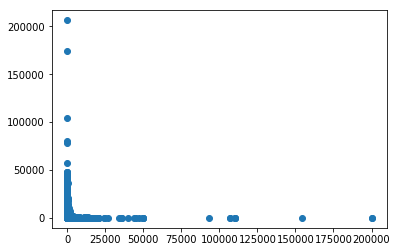

In [177]:

#Verifico outliers de surface_total_in_m2 y price_per_m2
plt.scatter(x=df['surface_total_in_m2'], y=df['price_per_m2'])


In [179]:
#estadisticas de price_per_m2
df['price_per_m2'].agg(['min', 'max','mean','median','size','std','quantile'])


min              0.600000
max         206333.333333
mean          2160.086916
median        1800.000000
size        121220.000000
std           2759.288621
quantile      1800.000000
Name: price_per_m2, dtype: float64

In [180]:
df['price_per_m2'].describe()

count     68617.000000
mean       2160.086916
std        2759.288621
min           0.600000
25%        1218.181818
50%        1800.000000
75%        2486.411765
max      206333.333333
Name: price_per_m2, dtype: float64

In [181]:
df['price_per_m2'].quantile([.25, .5, .75])

0.25    1218.181818
0.50    1800.000000
0.75    2486.411765
Name: price_per_m2, dtype: float64

In [182]:
# Obtengo los outliers para el lugar y tipo de propiedad
mean = df['price_per_m2'].mean()
std = df['price_per_m2'].std()

price_per_m2_outliers =  \
df.loc[(np.abs(df['price_per_m2'] - mean) > 3 * std)] # Que esten por encima o debajo de 3 desviaciones std.

q1 = df['price_per_m2'].quantile(.25)
q2 = df['price_per_m2'].quantile(.5)
q3 = df['price_per_m2'].quantile(.75)
ric = q3 - q1


price_per_m2_outliers_q =  \
df.loc[(df['price_per_m2'] > (df['price_per_m2'].quantile(.75) + (1.5 * ric)))] # Que esten por encima o debajo de 3 desviaciones std.


price_per_m2_outliers_q

#price_per_m2_outliers

#plt.scatter(x=price_per_m2_outliers['surface_total_in_m2'], y=price_per_m2_outliers['price_per_m2'])

,operation,property_type,place,country_name,state_name,geonames_id,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_per_m2,floor,rooms,expenses,description,price_flag,rooms_flag,place_flag
57,sell,store,Belgrano,Argentina,Capital Federal,3436077.0,-34.563972,-58.456535,250000.0,30.0,30.0,8333.333333,NaN,1,NaN,VENTA DE LOCAL SOBRE VÍA PÚBLICA CON RENTA - 3...,0,1,0
244,sell,apartment,Puerto Madero,Argentina,Capital Federal,3429760.0,-34.611464,-58.362745,550000.0,109.0,99.0,5045.871560,NaN,4,NaN,- Departamento de 4 ambientes- Pasante- Cocher...,0,0,0
252,sell,apartment,Puerto Madero,Argentina,Capital Federal,3429760.0,-34.619433,-58.361373,1195000.0,198.0,185.0,6035.353535,NaN,4,NaN,MADERO HARBOUR HOUSE. ESPECTACULAR DEPARTAMENT...,0,0,0
381,sell,apartment,Puerto Madero,Argentina,Capital Federal,3429760.0,-34.617915,-58.361766,350000.0,54.0,50.0,6481.481481,NaN,2,NaN,"En su dique 1, y delimitado por el Boulevard J...",0,0,0
400,sell,apartment,Puerto Madero,Argentina,Capital Federal,3429760.0,-34.617915,-58.361766,350000.0,54.0,50.0,6481.481481,NaN,2,NaN,"En su dique 1, y delimitado por el Boulevard J...",0,0,0
401,sell,apartment,Puerto Madero,Argentina,Capital Federal,3429760.0,-34.617915,-58.361766,330000.0,54.0,50.0,6111.111111,NaN,2,NaN,COCHERA NO NCUIDA EN EL PRECIO u$s40.000En su ...,0,0,0
571,sell,apartment,Tigre,Argentina,Bs.As. G.B.A. Zona Norte,NaN,-34.404641,-58.648759,850000.0,147.0,147.0,5782.312925,NaN,4,NaN,"YOO NORDELTA ES UN PROYECTO DE CARLOS OTT, CON...",0,0,0
602,sell,apartment,Tigre,Argentina,Bs.As. G.B.A. Zona Norte,NaN,-34.396765,-58.647663,415000.0,91.0,91.0,4560.439560,NaN,3,NaN,EXCELENTE DEPARTAMENTO EN ESQUINA EN EL MEJOR ...,0,0,0
610,sell,apartment,Vicente López,Argentina,Bs.As. G.B.A. Zona Norte,3432310.0,-34.494118,-58.484412,813000.0,100.0,100.0,8130.000000,NaN,5,NaN,Excelente Unidad de 5 ambientes grande de 225 ...,0,0,0
628,sell,apartment,Vicente López,Argentina,Bs.As. G.B.A. Zona Norte,3430310.0,-34.508218,-58.479448,250000.0,44.0,44.0,5681.818182,NaN,1,NaN,Departamento tipo Loft en piso 15 de 54 mts to...,0,0,0


In [183]:
price_per_m2_outliers_q.describe()

,geonames_id,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_per_m2,floor,expenses,price_flag,rooms_flag,place_flag
count,2.594000e+03,1503.000000,1503.000000,2.868000e+03,2868.000000,2739.000000,2868.000000,46.000000,407.000000,2868.0,2868.000000,2868.0
mean,3.466997e+06,-34.449054,-58.695350,8.505120e+05,108.752092,102.331143,10475.788802,8.217391,8627.626536,0.0,0.410739,0.0
std,2.044444e+05,1.014690,1.204007,8.776789e+05,112.618816,97.249336,9593.433210,5.411564,8565.391936,0.0,0.492054,0.0
min,3.427387e+06,-45.861746,-68.839987,6.700000e+04,10.000000,1.000000,4388.888889,1.000000,1.000000,0.0,0.000000,0.0
25%,3.429760e+06,-34.614482,-58.443323,3.680000e+05,38.000000,38.000000,5000.000000,3.000000,2700.000000,0.0,0.000000,0.0
50%,3.430234e+06,-34.588813,-58.416089,6.104770e+05,68.000000,67.000000,6129.961155,9.500000,6000.000000,0.0,0.000000,0.0
75%,3.436003e+06,-34.569339,-58.376924,9.682535e+05,144.000000,135.000000,14189.566667,12.000000,12250.000000,0.0,1.000000,0.0
max,6.693229e+06,-24.780039,-56.801482,1.400000e+07,2079.000000,1000.000000,206333.333333,22.000000,53000.000000,0.0,1.000000,0.0


In [184]:
price_per_m2_outliers.describe()

,geonames_id,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_per_m2,floor,expenses,price_flag,rooms_flag,place_flag
count,8.250000e+02,311.000000,311.000000,8.630000e+02,863.000000,856.000000,863.000000,3.000000,15.000000,863.0,863.000000,863.0
mean,3.503645e+06,-33.871079,-59.533314,9.924199e+05,49.149479,54.773364,21426.256583,2.333333,9986.666667,0.0,0.091541,0.0
std,2.397557e+05,1.851579,2.029309,1.019030e+06,58.987077,67.066625,11421.496885,2.309401,17788.032360,0.0,0.288544,0.0
min,3.427405e+06,-45.861746,-68.839987,1.300000e+05,10.000000,10.000000,10451.457143,1.000000,500.000000,0.0,0.000000,0.0
25%,3.429153e+06,-34.622204,-60.655366,5.670000e+05,30.000000,30.000000,15843.495935,1.000000,1100.000000,0.0,0.000000,0.0
50%,3.436003e+06,-34.606796,-58.430169,7.125400e+05,35.000000,35.000000,20162.333333,1.000000,2000.000000,0.0,0.000000,0.0
75%,3.436003e+06,-32.946093,-58.416089,9.606585e+05,41.000000,40.000000,24111.187500,3.000000,8000.000000,0.0,0.000000,0.0
max,6.693229e+06,-24.780039,-56.853366,1.200000e+07,517.000000,456.000000,206333.333333,5.000000,53000.000000,0.0,1.000000,0.0


In [185]:
# usar nueva columna
#Elimino caracteres non ascii de place
df.loc[df['place'].notnull(),'place'] = df.loc[df['place'].notnull(),'place'].apply(lambda place: _removeNonAscii(place.lower()))
#Elimino caracteres non ascii de state_name
df.loc[df['state_name'].notnull(),'state_name'] = df.loc[df['state_name'].notnull(),'state_name'].apply(lambda state_name: _removeNonAscii(state_name.lower()))


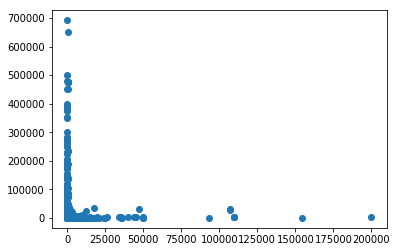

In [211]:
#Dataframe original
plt.scatter(x=df_bkp['surface_total_in_m2'], y=df_bkp['price_per_m2'])

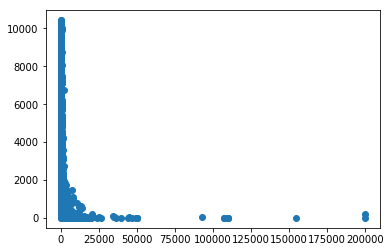

In [186]:
#Dataframe original sin outliers (aplicando desviacion estandar):
df_wo_outliers = df.drop(price_per_m2_outliers.index)
plt.scatter(x=df_wo_outliers['surface_total_in_m2'], y=df_wo_outliers['price_per_m2'])

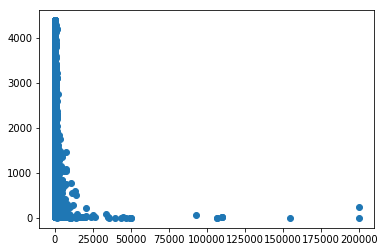

In [187]:
#Dataframe original sin outliers teniendo en cuenta rangos intercuartil
df_wo_outliers_2 = df.drop(price_per_m2_outliers_q.index)
plt.scatter(x=df_wo_outliers_2['surface_total_in_m2'], y=df_wo_outliers_2['price_per_m2'])

In [188]:
#Dataframe sin outliers de price_per_m2 con el metodo (np.abs(df['price_per_m2'] - mean) > 3 * std)
df_wo_outliers_2.describe()

,geonames_id,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_per_m2,floor,expenses,price_flag,rooms_flag,place_flag
count,9.990900e+04,68167.000000,68167.000000,9.794200e+04,79024.000000,98574.000000,65749.000000,7853.000000,1.385500e+04,118352.000000,118352.000000,118352.000000
mean,3.577232e+06,-34.630116,-59.278878,2.218144e+05,238.333494,133.903747,1797.352380,17.506431,4.902942e+03,0.172452,0.613864,0.000194
std,3.567524e+05,1.996807,2.316676,3.518865e+05,1813.986309,734.148889,885.749022,120.592543,1.221862e+05,0.377774,0.486865,0.013939
min,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000,0.000000,0.600000,1.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,3.430234e+06,-34.675527,-58.737322,8.845275e+04,50.750000,46.000000,1185.537588,1.000000,1.000000e+03,0.000000,0.000000,0.000000
50%,3.433910e+06,-34.598366,-58.482873,1.400000e+05,85.000000,75.000000,1755.813953,3.000000,1.900000e+03,0.000000,1.000000,0.000000
75%,3.836951e+06,-34.436331,-58.396435,2.500000e+05,200.000000,150.000000,2379.310345,6.000000,4.000000e+03,0.000000,1.000000,0.000000
max,6.948895e+06,4.545843,-53.733330,4.654544e+07,200000.000000,187000.000000,4387.800000,3150.000000,1.000150e+07,1.000000,1.000000,1.000000


In [189]:
#Dataframe sin outliers de price_per_m2 teniendo en cuenta rangos intercuartil
df_wo_outliers.describe()

,geonames_id,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_per_m2,floor,expenses,price_flag,rooms_flag,place_flag
count,1.016780e+05,69359.000000,69359.000000,9.994700e+04,81029.000000,100457.000000,67754.000000,7896.000000,1.424700e+04,120357.000000,120357.000000,120357.000000
mean,3.575017e+06,-34.629596,-59.265092,2.332012e+05,235.761900,133.717182,1914.688793,17.458080,5.003994e+03,0.169579,0.612769,0.000191
std,3.548510e+05,1.980862,2.301007,3.749214e+05,1791.575164,727.368574,1123.742863,120.266097,1.205022e+05,0.375264,0.487119,0.013823
min,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000,0.000000,0.600000,1.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,3.430234e+06,-34.670152,-58.725874,8.917304e+04,51.000000,46.000000,1208.333333,1.000000,1.000000e+03,0.000000,0.000000,0.000000
50%,3.433908e+06,-34.597985,-58.480223,1.432080e+05,85.000000,75.000000,1789.473684,3.000000,2.000000e+03,0.000000,1.000000,0.000000
75%,3.836873e+06,-34.442127,-58.395708,2.600000e+05,200.000000,150.000000,2448.282182,6.000000,4.000000e+03,0.000000,1.000000,0.000000
max,6.948895e+06,4.545843,-53.733330,4.654544e+07,200000.000000,187000.000000,10429.000000,3150.000000,1.000150e+07,1.000000,1.000000,1.000000


In [190]:
#Creo df con estadisticas por lugar utilizando el DF sin outliers y otro con outliers, para compararlos

df_price_per_m2 = df[df['price_per_m2'].notnull()].groupby(['state_name','place']).agg(['min', 'max','mean','median','size','std'])['price_per_m2']


df_price_per_m2_wo_outliers = df_wo_outliers_2[df_wo_outliers_2['price_per_m2'].notnull()].groupby(['state_name','place']).agg(['min', 'max','mean','median','size','std'])['price_per_m2']

In [191]:
df[df['price'].isnull()].groupby('place').size().sort_values(ascending=False).head(10)

place
rosario                    3769
crdoba                     2338
la plata                   1091
mar del plata               787
tigre                       741
ituzaing                    726
palermo                     535
morn                        499
belgrano                    458
san carlos de bariloche     356
dtype: int64

In [215]:
#Medidas de tendencia central agrupado por estado y ciudad con outliers
df_price_per_m2.sort_values('mean',ascending=False ).head()

min            max  \
state_name      place                                                  
entre ros       alejandro roca           24038.461538   24038.461538   
mendoza         san francisco del monte  15833.333333   15833.333333   
capital federal boedo                      789.473684  206333.333333   
                san cristobal              662.790698   26241.636364   
crdoba          monte cristo              6400.000000    6400.000000   

                                                 mean        median  size  \
state_name      place                                                       
entre ros       alejandro roca           24038.461538  24038.461538     1   
mendoza         san francisco del monte  15833.333333  15833.333333     1   
capital federal boedo                    10697.513056   7661.666667   800   
                san cristobal             9952.388570   2716.831395   454   
crdoba          monte cristo              6400.000000   6400.000000     1   

                                                  std  
state_name      place                                  
entre ros       alejandro roca                    NaN  
mendoza         san francisco del monte           NaN  
capital federal boedo                    13188.768866  
                san cristobal             9768.989436  
crdoba          monte cristo                      NaN

In [216]:
#Medidas de tendencia central agrupado por estado y ciudad SIN outliers
df_price_per_m2_wo_outliers.sort_values('mean',ascending=False ).head()

,,min,max,mean,median,size,std
state_name,place,,,,,,
mendoza,capilla del rosario,4375.000000,4375.000000,4375.000000,4375.000000,1,NaN
capital federal,puerto madero,875.000000,4333.333333,3729.480095,4018.691589,39,767.585622
ro negro,villa llao llao,3250.000000,3250.000000,3250.000000,3250.000000,1,NaN
san juan,trinidad,3191.489362,3191.489362,3191.489362,3191.489362,1,NaN
capital federal,las caitas,1491.017964,4301.886792,3173.882321,3142.857143,108,552.370452


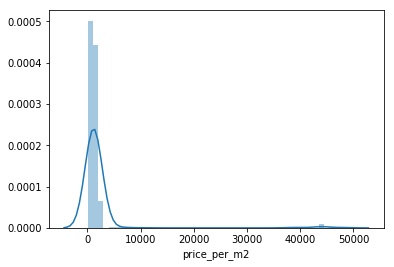

In [194]:
sns.distplot(df.loc[(df['place'] == 'general san martn') & (df['price_per_m2'].notnull()),'price_per_m2'])

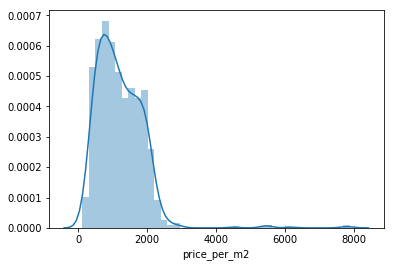

In [195]:
#
sns.distplot(df_wo_outliers.loc[(df_wo_outliers['place'] == 'general san martn') & (df_wo_outliers['price_per_m2'].notnull()),'price_per_m2'])


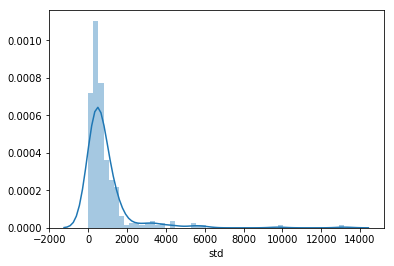

In [196]:
#distplot std
sns.distplot(df_price_per_m2.loc[(df_price_per_m2['std'].notnull()),'std'])

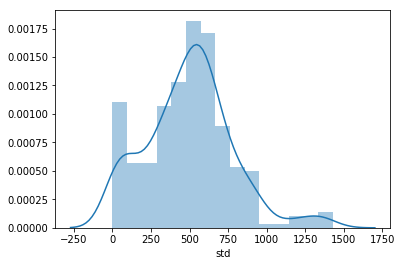

In [197]:
#distplot std
sns.distplot(df_price_per_m2_wo_outliers.loc[(df_price_per_m2_wo_outliers['std'].notnull()),'std'])

In [198]:
#Correlacion entre surface_total_in_m2 y precio
df[['surface_total_in_m2','price']].corr()


,surface_total_in_m2,price
surface_total_in_m2,1.000000,0.301137
price,0.301137,1.000000


In [199]:
#Correlacion entre surface_total_in_m2 y precio sin outliers
df_wo_outliers[['surface_total_in_m2','price']].corr()


,surface_total_in_m2,price
surface_total_in_m2,1.000000,0.325264
price,0.325264,1.000000


In [200]:
#Calculo el precio por m2 en base a la media por ciudad 
df.loc[df["price_per_m2"].isnull(),'price_per_m2'] =  \
df.loc[df['price_per_m2'].isnull()].apply(lambda row: get_mean(row.state_name, row.place), axis=1)


print 'Successfully: '  + str(cnt_success)
print 'Errors: ' + str(cnt_error)


Successfully: 52603
Errors: 1013


In [201]:
df.loc[df['price_per_m2'].isnull()]

,operation,property_type,place,country_name,state_name,geonames_id,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_per_m2,floor,rooms,expenses,description,price_flag,rooms_flag,place_flag
5,sell,house,gualeguaych,Argentina,entre ros,3433657.0,-33.014071,-58.519828,NaN,53.0,NaN,NaN,NaN,2,NaN,"Casa en el perímetro del barrio 338, ubicada e...",1,1,0
180,sell,house,emilia,Argentina,santa fe,3856226.0,-31.060660,-60.749647,NaN,NaN,NaN,NaN,NaN,8,NaN,Corredor Responsable: Gerardo Portmann - CCI M...,1,0,0
486,sell,apartment,esperanza,Argentina,santa fe,3856022.0,-31.443394,-60.930482,NaN,NaN,NaN,NaN,NaN,3,NaN,Corredor Responsable: Gerardo Portmann - CCI M...,1,0,0
487,sell,house,esperanza,Argentina,santa fe,3856022.0,-31.456348,-60.917820,NaN,NaN,NaN,NaN,NaN,4,NaN,Corredor Responsable: Gerardo Portmann - CCI M...,1,0,0
497,sell,apartment,rivadavia,Argentina,buenos aires interior,3838609.0,NaN,NaN,169000.00,NaN,75.0,NaN,NaN,2,NaN,"Torre Gaudiacute;, se destaca por su ubicacion...",0,1,0
498,sell,apartment,rivadavia,Argentina,buenos aires interior,3838609.0,NaN,NaN,137000.00,NaN,55.0,NaN,NaN,1,NaN,"Torre Gaudiacute;, se destaca por su ubicacion...",0,1,0
499,sell,apartment,rivadavia,Argentina,buenos aires interior,3838609.0,NaN,NaN,103000.00,NaN,37.0,NaN,NaN,1,NaN,"Torre Gaudiacute;, se destaca por su ubicacion...",0,1,0
679,sell,apartment,rivadavia,Argentina,buenos aires interior,3838609.0,NaN,NaN,239000.00,NaN,85.0,NaN,NaN,2,NaN,"Amplia unidad de 2 dormitorios, 3 bantilde;os ...",0,1,0
915,sell,house,bella italia,Argentina,santa fe,6942842.0,-31.255283,-61.474270,NaN,456.0,220.0,NaN,NaN,1,NaN,Ideal para Inversores. Son 2 casas en un mismo...,1,0,0
1052,sell,house,san francisco,Argentina,crdoba,3837675.0,-31.403699,-62.103566,NaN,500.0,150.0,NaN,NaN,4,NaN,"CASA QUINTA DOS TERRENOS, DOS DORMITORIOS, BAÑ...",1,0,0


In [202]:
df_price_per_m2.loc['santa fe',]['mean'].sort_values()
#df_price_per_m2_wo_outliers.loc['santa fe',]['mean'].sort_values()

place
monte vera                      9.388501
pueblo andino                  45.794393
coronda                        76.771599
timbes                         85.515133
monje                          91.192959
recreo                        166.665262
mara juana                    190.684480
fighiera                      196.292850
ricardone                     223.343153
glvez                         240.358600
rafaela                       251.657500
arroyo seco                   264.550265
franck                        280.418379
venado tuerto                 316.831683
serodino                      333.333333
ibarlucea                     349.873118
fray luis beltrn              352.244821
alvear                        403.350150
reconquista                   438.962610
roldn                         444.166684
empalme villa constitucin     455.679833
capitn bermdez                463.231674
malabrigo                     467.363967
murphy                        468.750000
granadero 

In [203]:
df[df['price_per_m2'].isnull()]

,operation,property_type,place,country_name,state_name,geonames_id,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_per_m2,floor,rooms,expenses,description,price_flag,rooms_flag,place_flag
5,sell,house,gualeguaych,Argentina,entre ros,3433657.0,-33.014071,-58.519828,NaN,53.0,NaN,NaN,NaN,2,NaN,"Casa en el perímetro del barrio 338, ubicada e...",1,1,0
180,sell,house,emilia,Argentina,santa fe,3856226.0,-31.060660,-60.749647,NaN,NaN,NaN,NaN,NaN,8,NaN,Corredor Responsable: Gerardo Portmann - CCI M...,1,0,0
486,sell,apartment,esperanza,Argentina,santa fe,3856022.0,-31.443394,-60.930482,NaN,NaN,NaN,NaN,NaN,3,NaN,Corredor Responsable: Gerardo Portmann - CCI M...,1,0,0
487,sell,house,esperanza,Argentina,santa fe,3856022.0,-31.456348,-60.917820,NaN,NaN,NaN,NaN,NaN,4,NaN,Corredor Responsable: Gerardo Portmann - CCI M...,1,0,0
497,sell,apartment,rivadavia,Argentina,buenos aires interior,3838609.0,NaN,NaN,169000.00,NaN,75.0,NaN,NaN,2,NaN,"Torre Gaudiacute;, se destaca por su ubicacion...",0,1,0
498,sell,apartment,rivadavia,Argentina,buenos aires interior,3838609.0,NaN,NaN,137000.00,NaN,55.0,NaN,NaN,1,NaN,"Torre Gaudiacute;, se destaca por su ubicacion...",0,1,0
499,sell,apartment,rivadavia,Argentina,buenos aires interior,3838609.0,NaN,NaN,103000.00,NaN,37.0,NaN,NaN,1,NaN,"Torre Gaudiacute;, se destaca por su ubicacion...",0,1,0
679,sell,apartment,rivadavia,Argentina,buenos aires interior,3838609.0,NaN,NaN,239000.00,NaN,85.0,NaN,NaN,2,NaN,"Amplia unidad de 2 dormitorios, 3 bantilde;os ...",0,1,0
915,sell,house,bella italia,Argentina,santa fe,6942842.0,-31.255283,-61.474270,NaN,456.0,220.0,NaN,NaN,1,NaN,Ideal para Inversores. Son 2 casas en un mismo...,1,0,0
1052,sell,house,san francisco,Argentina,crdoba,3837675.0,-31.403699,-62.103566,NaN,500.0,150.0,NaN,NaN,4,NaN,"CASA QUINTA DOS TERRENOS, DOS DORMITORIOS, BAÑ...",1,0,0


In [204]:
df.loc[df['price'].isnull()]

,operation,property_type,place,country_name,state_name,geonames_id,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_per_m2,floor,rooms,expenses,description,price_flag,rooms_flag,place_flag
5,sell,house,gualeguaych,Argentina,entre ros,3433657.0,-33.014071,-58.519828,NaN,53.0,NaN,NaN,NaN,2,NaN,"Casa en el perímetro del barrio 338, ubicada e...",1,1,0
20,sell,house,villa giardino,Argentina,crdoba,3832729.0,-31.052985,-64.499128,NaN,148.0,148.0,267.864769,NaN,6,NaN,"Consta de: Comedor-cocina, cuatro dormitorios ...",1,1,0
41,sell,apartment,villa carlos paz,Argentina,crdoba,3832791.0,-31.400999,-64.478026,NaN,115.0,115.0,849.730088,NaN,4,NaN,“Arecas” es un complejo de dúplex y departamen...,1,0,0
62,sell,house,berazategui,Argentina,bs.as. g.b.a. zona sur,3436042.0,NaN,NaN,NaN,156.0,156.0,1594.403446,NaN,6,NaN,Casa moderna en dos plantas.PB : Living con ho...,1,1,0
67,sell,house,ituzaing,Argentina,bs.as. g.b.a. zona oeste,3433359.0,-34.642230,-58.703130,NaN,220.0,NaN,955.040245,NaN,5,NaN,PLANTA ALTA: DORMITORIO EN SUITE - BALCÓNPLANT...,1,0,0
76,sell,house,mar del plata,Argentina,buenos aires costa atlntica,3430863.0,-38.016686,-57.533298,NaN,450.0,400.0,1655.812102,NaN,5,NaN,Impecable casa moderna ubicada en la loma de S...,1,0,0
83,sell,apartment,rosario,Argentina,santa fe,3838574.0,-32.954877,-60.651838,NaN,55.0,55.0,1637.773679,5.0,2,NaN,IDEAL INVERSORES o ESTUDIANTES APTA CREDITO An...,1,0,0
84,sell,apartment,rosario,Argentina,santa fe,3838574.0,-32.932766,-60.653385,NaN,55.0,55.0,1637.773679,NaN,2,NaN,Departamento en PB con cocina comedor separado...,1,0,0
85,sell,apartment,rosario,Argentina,santa fe,3838574.0,-32.958837,-60.645641,NaN,63.0,63.0,1637.773679,1.0,1,NaN,Corrientes 1900 – 1º Piso Departamento de 1 do...,1,0,0
100,sell,apartment,rosario,Argentina,santa fe,3838574.0,-32.935230,-60.671086,NaN,0.0,NaN,1637.773679,NaN,1,NaN,San Nicolás 365ENTREGA INMEDIATA.Edificio de e...,1,1,0


In [205]:
#Calculo surface_covered_in_m2 y/o surface_total_in_m2 en base a la descripcion
regexp="(\d+)(\s|())mts(..)cub|(\d+)(\s|())mts(.)cub|(\d+)(\s|())metros cub"
#surface_covered_in_m2
df.loc[df['surface_covered_in_m2'].isnull() & df["description"].notnull() & df["price"].isnull(),'surface_covered_in_m2'] =  \
df.loc[df['surface_covered_in_m2'].isnull() & df["description"].notnull() & df["price"].isnull(),'description'].str.lower().str.extract(regexp)[0]
regexp="(\d+)(\s|())mts(..)cub|(\d+)(\s|())mts(.)cub|(\d+)(\s|())metros cub"
#surface_total_in_m2: surface_covered_in_m2 y surface_total_in_m2 Null
regexp="(\d+)(\s|())mts|(\d+)(\s|())metros"
df.loc[df['surface_total_in_m2'].isnull() & df['surface_covered_in_m2'].isnull() & df["description"].notnull() & df["price"].isnull(),'surface_total_in_m2'] =  \
df.loc[df['surface_total_in_m2'].isnull() & df['surface_covered_in_m2'].isnull() & df["description"].notnull() & df["price"].isnull(),'description'].str.lower().str.extract(regexp)[0]


In [122]:
#Valido por ejemplo esperanza santa fe, no tiene estadisticas
df.loc[df['place'] == 'bella italia'].groupby(['state_name','place']).agg(['min', 'max','mean','size','std'])['price_per_m2']

,,min,max,mean,size,std
state_name,place,,,,,
santa fe,bella italia,NaN,NaN,NaN,2,NaN


In [123]:
df.loc[df['price'].isnull() & df['price_per_m2'].notnull() & df['surface_total_in_m2'].notnull()]

,operation,property_type,place,country_name,state_name,geonames_id,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_per_m2,floor,rooms,expenses,description,price_flag,rooms_flag,place_flag


In [207]:
#Tengo price_per_m2 y surface_total_in_m2 pero no precio entonces calculo precio
df.loc[df['price'].isnull() & df['price_per_m2'].notnull() & df['surface_total_in_m2'].notnull(), 'price'] =  \
df.loc[df['price'].isnull() & df['price_per_m2'].notnull() & df['surface_total_in_m2'].notnull()].apply(lambda row: (np.int(row.price_per_m2) * np.int(row.surface_total_in_m2)), axis=1)

In [208]:
#Tengo price_per_m2 y surface_covered_in_m2 pero no precio entonces calculo precio
df.loc[df['price'].isnull() & df['price_per_m2'].notnull() & df['surface_covered_in_m2'].notnull(), 'price'] = \
df.loc[df['price'].isnull() & df['price_per_m2'].notnull() & df['surface_covered_in_m2'].notnull()].apply(lambda row: (np.int(row.price_per_m2) * np.int(row.surface_covered_in_m2)), axis=1)

In [137]:
#Cantidad de precios calculados hasta el momento
print 'Price:'
df[df['price_flag'] == 1]['price_flag'].sum() - df['price'].isnull().sum()


Price:


18916

In [127]:
print 'Rooms:'
df[df['rooms_flag'] == 1]['rooms_flag'].sum() - df['rooms'].isnull().sum()

Rooms:


70234

In [128]:
df.loc[(df['price'].isnull()) & (df['place'] == 'rosario')].sort_values(['state_name','place'],ascending=False)

,operation,property_type,place,country_name,state_name,geonames_id,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_per_m2,floor,rooms,expenses,description,price_flag,rooms_flag,place_flag
526,sell,apartment,rosario,Argentina,santa fe,3838574.0,-32.953488,-60.628194,NaN,NaN,NaN,1651.92334,NaN,NaN,NaN,Departamento en construccion al contrafrente -...,1,1,0
527,sell,house,rosario,Argentina,santa fe,3838574.0,-32.940379,-60.652708,NaN,NaN,NaN,1651.92334,NaN,NaN,NaN,"Inmueble compuesto por dos casas, una en PB y ...",1,1,0
528,sell,apartment,rosario,Argentina,santa fe,3838574.0,-32.923369,-60.676876,NaN,NaN,NaN,1651.92334,NaN,NaN,NaN,Entrega inmediata. Externo con balcón,1,1,0
4726,sell,store,rosario,Argentina,santa fe,3838574.0,-32.978008,-60.662029,NaN,NaN,NaN,1651.92334,NaN,NaN,NaN,Corredor Responsable: Sebastian Pellegrini - C...,1,1,0
5001,sell,apartment,rosario,Argentina,santa fe,3838574.0,-32.947184,-60.671244,NaN,NaN,NaN,1651.92334,NaN,NaN,NaN,Departamento de dos dormitorios al frente con ...,1,1,0
7346,sell,apartment,rosario,Argentina,santa fe,3838574.0,-32.973709,-60.636151,NaN,NaN,NaN,1651.92334,NaN,NaN,NaN,"Departamento, Santa Fe, Rosario",1,1,0
7347,sell,apartment,rosario,Argentina,santa fe,3838574.0,-32.940978,-60.690273,NaN,NaN,NaN,1651.92334,NaN,NaN,NaN,"Departamento, Santa Fe, Rosario",1,1,0
7348,sell,apartment,rosario,Argentina,santa fe,3838574.0,-32.940978,-60.690273,NaN,NaN,NaN,1651.92334,NaN,NaN,NaN,"Departamento, Santa Fe, Rosario",1,1,0
7349,sell,apartment,rosario,Argentina,santa fe,3838574.0,-32.940978,-60.690273,NaN,NaN,NaN,1651.92334,NaN,NaN,NaN,"Departamento, Santa Fe, Rosario",1,1,0
7350,sell,apartment,rosario,Argentina,santa fe,3838574.0,-32.940978,-60.690273,NaN,NaN,NaN,1651.92334,NaN,NaN,NaN,"Departamento, Santa Fe, Rosario",1,1,0


In [210]:
#Cantidad de precios faltantes por lugar
df[df['price'].isnull()].groupby('place').size().sort_values(ascending=False)#.head(15)

place
rosario                      768
crdoba                       447
la plata                     421
santa fe                     234
mar del plata                157
castellanos                  131
salta                        113
escobar                      109
san carlos de bariloche      102
confluencia                  100
quilmes                       97
esperanza                     69
la matanza                    69
mendoza                       61
tres de febrero               57
general roca                  49
santo tom                     43
san miguel de tucumn          41
santa rosa                    39
santa rosa de calamuchita     35
morn                          34
berazategui                   29
esteban echeverra             29
san lorenzo                   29
flores                        28
rafaela                       27
villa carlos paz              25
ituzaing                      25
godoy cruz                    25
reconquista                   25
    

In [130]:
#Cantidad de precios faltantes por lugar
df[df['price_flag'] == 1].groupby('place').size().sort_values(ascending=False)#.sum()

place
rosario                      3769
crdoba                       2338
la plata                     1091
mar del plata                 787
tigre                         741
ituzaing                      726
palermo                       535
morn                          499
belgrano                      458
san carlos de bariloche       356
santa fe                      340
capital federal               339
moreno                        273
villa urquiza                 269
la matanza                    253
pilar                         245
san miguel de tucumn          232
quilmes                       225
caballito                     217
merlo                         205
almagro                       179
escobar                       166
yerba buena                   163
salta                         155
esteban echeverra             148
villa crespo                  145
confluencia                   143
castellanos                   131
recoleta                      123
berazate

In [131]:
#tengo ambiente y price_per_m2 y no tengo precio ni surface_covered_in_m2
#entonces estimo surface_covered_in_m2 en base a los ambientes y luego calculo precio

#df[df['price_per_m2'].notnull() & df['rooms'].notnull() & df['price'].isnull() & df['surface_covered_in_m2'].isnull()]['price_per_m2']

df.loc[df["price_per_m2"].notnull() & df["rooms"].notnull() & df['price'].isnull() & df['surface_covered_in_m2'].isnull(),"surface_covered_in_m2"] =  \
df.loc[df["price_per_m2"].notnull() & df["rooms"].notnull() & df['price'].isnull() & df['surface_covered_in_m2'].isnull(),"rooms"].apply(lambda rooms: calcula_mts2_xambientes(rooms))


In [132]:
#Vuelvo a ejecutar 'Tengo price_per_m2 y surface_covered_in_m2 pero no precio entonces calculo precio'

In [133]:
#PUEDEN HABER precio x mtr pero no precio

df.loc[df['price'].isnull() & df['surface_covered_in_m2'].notnull()]

,operation,property_type,place,country_name,state_name,geonames_id,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,price_per_m2,floor,rooms,expenses,description,price_flag,rooms_flag,place_flag
915,sell,house,bella italia,Argentina,santa fe,6942842.0,-31.255283,-61.474270,NaN,456,220,NaN,NaN,1,NaN,Ideal para Inversores. Son 2 casas en un mismo...,1,0,0
1052,sell,house,san francisco,Argentina,crdoba,3837675.0,-31.403699,-62.103566,NaN,500,150,NaN,NaN,4,NaN,"CASA QUINTA DOS TERRENOS, DOS DORMITORIOS, BAÑ...",1,0,0
1418,sell,house,san francisco,Argentina,crdoba,3837675.0,-31.371005,-62.098236,NaN,450,100,NaN,NaN,3,NaN,Hermosa Propiedad Esquina en Plaza San Francis...,1,1,0
1805,sell,house,las talitas,Argentina,tucumn,NaN,-26.781689,-65.184105,NaN,NaN,220,NaN,NaN,3,NaN,B° privado LAS MORITAS - a 10 minutos de la ci...,1,0,0
1921,sell,house,carmen de areco,Argentina,buenos aires interior,3435643.0,-34.417755,-59.773972,NaN,200,200,NaN,NaN,3,NaN,Zona:Buena-Asfalto-Obra sanitaria:Pozo-Medidas...,1,0,0
1930,sell,house,las tapias,Argentina,crdoba,3847770.0,-31.959482,-65.074783,NaN,600,60,NaN,NaN,1,NaN,Casa de 1 dormitorio (con placard) cocina come...,1,0,0
1935,sell,house,los pozos,Argentina,crdoba,3845710.0,-30.519684,-64.253006,NaN,120,120,NaN,NaN,2,NaN,A 50 mts Camino al Dique. Casa reciclada compu...,1,0,0
2002,sell,house,santa rosa de calamuchita,Argentina,crdoba,3835943.0,-32.076958,-64.584427,NaN,450,150,NaN,NaN,2,NaN,Venta de Casa nueva con artefactos e instalaci...,1,0,0
2065,sell,house,santa rosa de calamuchita,Argentina,crdoba,3835943.0,-32.068741,-64.540245,NaN,1000,150,NaN,NaN,4,NaN,Se vende propiedad en Santa Rosa de Calamuchit...,1,0,0
2459,sell,house,vistalba,Argentina,mendoza,3832509.0,-32.908298,-68.881195,NaN,550,150,NaN,NaN,2,NaN,CASA UBICADA EN VISTALBA TERRENO 550 M2 SUP. ...,1,0,0


In [209]:
df.describe()

,geonames_id,lat,lon,price,price_per_m2,floor,expenses,price_flag,rooms_flag,place_flag
count,1.025030e+05,69670.000000,69670.000000,1.166500e+05,120207.000000,7899.000000,1.426200e+04,121220.000000,121220.000000,121220.000000
mean,3.574442e+06,-34.626210,-59.266290,2.570857e+05,1915.351039,17.452336,5.009234e+03,0.168372,0.609058,0.000190
std,3.541306e+05,1.980936,2.299922,8.519923e+05,2132.731555,120.243621,1.204403e+05,0.374197,0.487963,0.013773
min,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.600000,1.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,3.430234e+06,-34.669065,-58.727040,8.973388e+04,1298.472925,1.000000,1.000000e+03,0.000000,0.000000,0.000000
50%,3.433910e+06,-34.597985,-58.480128,1.450000e+05,1637.773679,3.000000,2.000000e+03,0.000000,1.000000,0.000000
75%,3.836668e+06,-34.441299,-58.395908,2.700000e+05,2192.982456,6.000000,4.000000e+03,0.000000,1.000000,0.000000
max,6.948895e+06,4.545843,-53.733330,1.404910e+08,206333.333333,3150.000000,1.000150e+07,1.000000,1.000000,1.000000
